In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

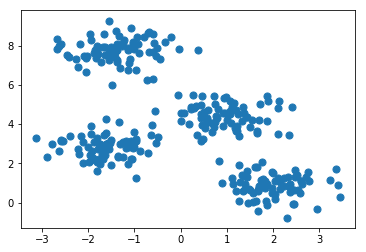

In [3]:
# generate blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]


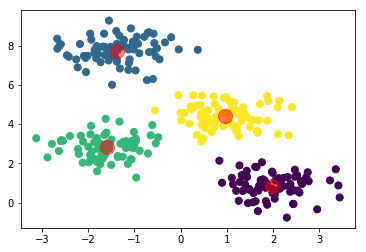

In [17]:
# cluster blobs with just the right value for k
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

print(kmeans.cluster_centers_)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

In [15]:
centers

array([[-1.58438467,  2.83081263],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906]])

In [35]:
kmeans.inertia_

1165177.713706214

Text(0,0.5,'within cluster sum of squares')

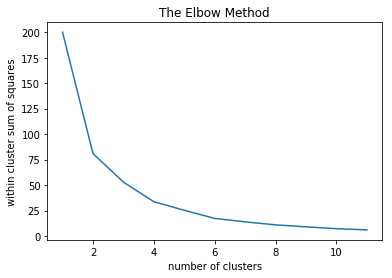

In [43]:
#Calculate the wcss
wcss=[]
number_cluster= range(1,12)
for i in number_cluster:
    kmeans=KMeans(i)
    kmeans.fit(X)
    wcss_itr = kmeans.inertia_
    wcss.append(wcss_itr)

#Plotting the elbow
plt.plot(number_cluster, wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('within cluster sum of squares')

In [18]:
# Source: http://www.slideshare.net/SarahGuido/kmeans-clustering-with-scikitlearn
def elbow(df, n):
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    import numpy as np
    from scipy.spatial.distance import cdist, pdist
    # kmeans models for each k
    kMeansVar = [KMeans(n_clusters=k).fit(df.values) for k in range(1, n+1)]
    # get the centroids of the models
    centroids = [X.cluster_centers_ for X in kMeansVar]
    # find the distances of the values to the centroids
    k_euclid = [cdist(df.values, cent) for cent in centroids]
    # find the distance of each point to its cluster center
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    # total within cluster sum of squares
    wcss = [sum(d**2) for d in dist]
    # total sum of squares
    tss = sum(pdist(df.values)**2)/df.values.shape[0]
    # between clusters sum of squares
    bss = tss - wcss
    plt.plot(list(range(1,n+1)),bss)
    plt.show()

Number of clusters: 7


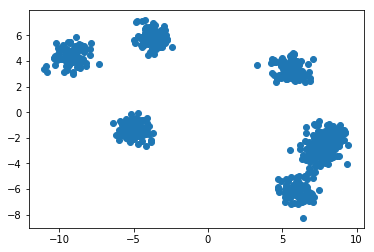

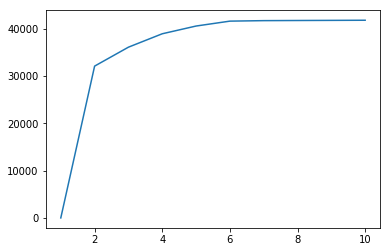

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

k = int(input("Number of clusters: "))

X, y_true = make_blobs(n_samples=k*100, centers=k, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1]);
plt.show()

Xdf = pd.DataFrame(X)
elbow(Xdf,10)

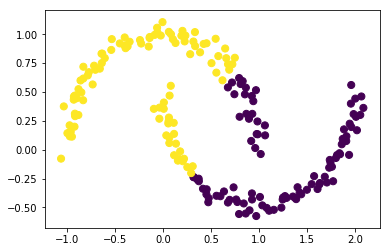

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05)
labels = KMeans(2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.show()

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [34]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

<Figure size 432x288 with 0 Axes>

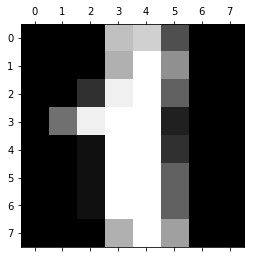

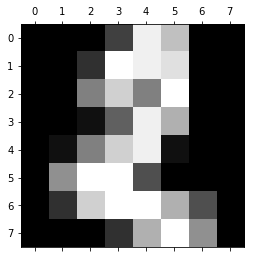

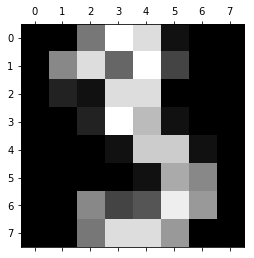

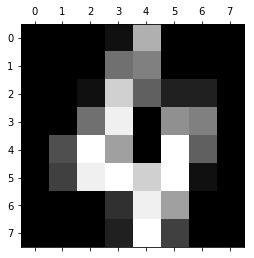

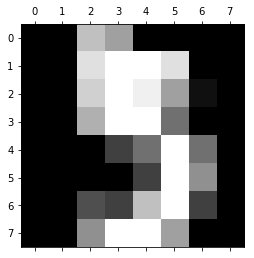

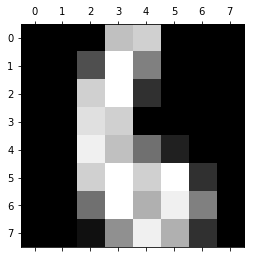

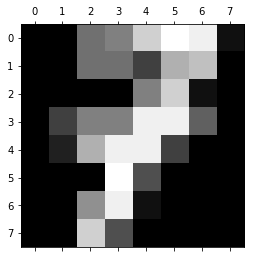

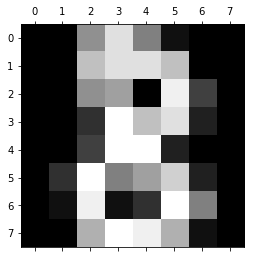

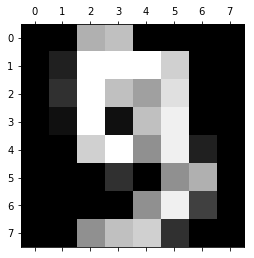

In [33]:
import matplotlib.pyplot as plt 
plt.gray() 
for image in range (1,10):
    plt.matshow(digits.images[image]) 
    plt.show()

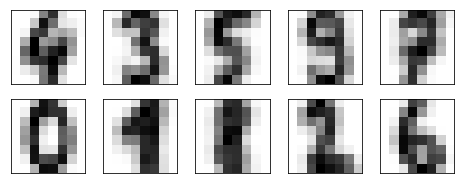

In [24]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(digits.data)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)